# Optimization of Growth Rate, Cell Volume, and Ribosome Copy Number 

In [186]:
import numpy as np 
import sympy as sp
import pandas as pd
import altair as alt
import math
import matplotlib.pyplot as plt
import prot.viz 
# alt.data_transformers.enable('json')
alt.data_transformers.disable_max_rows()
#prot.vz.altair_theme()
colors = prot.viz.plotting_style()

In [ ]:
prot.viz.plot

In [166]:
rt_max = sp.Symbol('{{r_t^{(max)}}}') # Maximum elongation rate
r_t = sp.Symbol('{{r_t}}') # Elongation rate
r_AA = sp.Symbol('{{r_{AA}}}') # Rate of amino acid supply
K_D = sp.Symbol('{{K_D}}') # Dissociation constant
R = sp.Symbol('{{R}}') # Number of ribosomes per cell
f_a = sp.Symbol('{{f_a}}') # Fraction of ribosomes that are active
V = sp.Symbol('{{V}}') # Cell volume
N_A = sp.Symbol('{{N_A}}') # Avogadro's number
N_pep = sp.Symbol('{{N_{pep}}}') # Number of peptide bonds to be formed
t = sp.Symbol('{{t}}') # time
lam = sp.Symbol('\lambda') # Growth rate

# Define the equation
# aa_eff = t * (r_aa + r_t * R * f_a) / (V * N_A)
# eq = rt_max / (1 + (K_D / aa_eff)) - r_t
rt_prefix = (r_AA + rt_max * R) + K_D * V * N_A
rt_sqrta = (r_AA + rt_max * R + K_D * V * N_A)**2
rt_sqrtb = 4 * R * (rt_max * r_AA)
rt = (rt_prefix - sp.sqrt(rt_sqrta - rt_sqrtb))/ (2 * R)
rt

({{K_D}}*{{N_A}}*{{V}} + {{R}}*{{r_t^{(max)}}} + {{r_{AA}}} - sqrt(-4*{{R}}*{{r_t^{(max)}}}*{{r_{AA}}} + ({{K_D}}*{{N_A}}*{{V}} + {{R}}*{{r_t^{(max)}}} + {{r_{AA}}})**2))/(2*{{R}})

In [167]:
# Define the equation for the translation rate.
growth_rate = (R * rt/ N_pep)
growth_rate

({{K_D}}*{{N_A}}*{{V}}/2 + {{R}}*{{r_t^{(max)}}}/2 + {{r_{AA}}}/2 - sqrt(-4*{{R}}*{{r_t^{(max)}}}*{{r_{AA}}} + ({{K_D}}*{{N_A}}*{{V}} + {{R}}*{{r_t^{(max)}}} + {{r_{AA}}})**2)/2)/{{N_{pep}}}

In [168]:
dlam_dR = sp.diff(growth_rate, R)
dlam_dV = sp.diff(growth_rate, V)
dlam_dV

({{K_D}}*{{N_A}}/2 - {{K_D}}*{{N_A}}*({{K_D}}*{{N_A}}*{{V}} + {{R}}*{{r_t^{(max)}}} + {{r_{AA}}})/(2*sqrt(-4*{{R}}*{{r_t^{(max)}}}*{{r_{AA}}} + ({{K_D}}*{{N_A}}*{{V}} + {{R}}*{{r_t^{(max)}}} + {{r_{AA}}})**2)))/{{N_{pep}}}

In [231]:
def elongation_rate(R, V, N_pep, r_aa, f_a=1, N_A=6.022E23, t=1, rt_max=17.1,
                    K_D=5E-3):
    prefix = K_D * N_A * V + R * rt_max + r_aa
    sqrt_a = (K_D * N_A * V + R * rt_max + r_aa)**2
    sqrt_b = 4 * R * rt_max * r_aa
    denom = 2 * R
    return (prefix - np.sqrt(sqrt_a - sqrt_b))/denom 

def vol_R(R):
    return np.exp(-5.58) * R**0.6

def R_vol(V):
#     if type(V) != float:
#         return [math.log((v*1E-15)/np.exp(-5.58), 0.6) for v in V]
    return math.log((V*1E-15)/np.exp(-5.58), 0.6)

def npep_R(R):
    return np.exp(16.1) * R**0.5

def npep_V(V):
    return npep_R(R_vol(V))

def R_npep(N_pep):
    return [math.log(n/np.exp(16.1), 0.5) for n in N_pep]

def growth_rate(R, V, r_aa): 
    N_pep = npep_V(V)
    r_t = elongation_rate(R, V * 1E-15, N_pep, r_aa)
    return (3600 * R * r_t) / N_pep

In [232]:
R_range = np.logspace(2,10, 200) 
V_range = np.linspace(0.03, 2, 200)
r_aa = np.logspace(2, 8, 4)
def lam(R, V, r_aa):
    out = np.zeros((len(R), len(V)))
    for j, r in enumerate(R):
        for i, v in enumerate(V):
            out[i, j] = growth_rate(r, v, r_aa)
    return out

lams = []
for r in r_aa:
    lams.append(lam(R_range, V_range, r))


78291526.56165627
77946922.81346883
77678041.24777722
77457380.47297819
77270161.76639333
77107515.82018137
76963697.59083316
76834770.8985475
76717920.09949067
76611061.04817083
76512607.56839828
76421324.31033063
76336230.2634728
76256533.33383644
76181584.70268677
76110846.1944824
76043866.44183029
75980263.1456468
75919709.65008435
75861924.63062039
75806664.0669486
75753714.91864266
75702890.08756323
75654024.36497085
75606971.14093937
75561599.71016435
75517793.04892768
75475445.96763581
75434463.56524035
75394759.92818974
75356257.02888758
75318883.78801993
75282575.2723291
75247272.00500335
75212919.37022017
75179467.09681988
75146868.80881102
75115081.63258377
75084065.85245332
75053784.607565
75024203.62433794
74995290.97955911
74967016.89000641
74939353.52511239
74912274.83970371
74885756.42428763
74859775.37072092
74834310.15140167
74809340.51038194
74784847.36501631
74760812.71694556
74737219.5713715
74714051.86371277
74691294.39284582
74668932.76023382
74646953.31433082
7

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-232-9ffcf83dea1f>", line 13, in <module>
    lams.append(lam(R_range, V_range, r))
  File "<ipython-input-232-9ffcf83dea1f>", line 8, in lam
    out[i, j] = growth_rate(r, v, r_aa)
  File "<ipython-input-231-e10e79812720>", line 28, in growth_rate
    print(N_pep)
  File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/iostream.py", line 404, in write
    self.pub_thread.schedule(lambda : self._buffer.write(string))
  File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/iostream.py", line 205, in schedule
    self._event_pipe.send(b'')
  File "/opt/anaconda3/lib/python3.8/site-packages/zmq/sugar/socket.py", line 416, in send
    return super(Socket, self).send(data, flags=flags, copy=copy, track=track)
  File "zmq/backend/cython/socket.pyx", line 728, in zmq

TypeError: object of type 'NoneType' has no len()

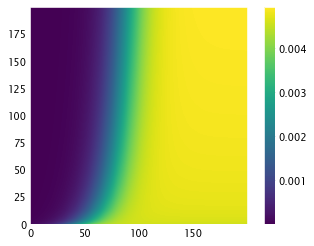

In [229]:
plt.imshow(lams[0], cmap='viridis', origin='lower')
plt.colorbar()

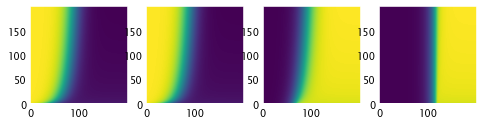

In [225]:
fig, ax = plt.subplots(1,4, figsize=(8, 3))

ax[0].imshow(lams[0], cmap='viridis', origin='lower')
ax[1].imshow(lams[1], cmap='viridis', origin='lower')
ax[2].imshow(lams[2], cmap='viridis', origin='lower')
ax[3].imshow(lams[3], cmap='viridis', origin='lower')

In [161]:
R_range = np.logspace(2, 7, 200)
V_range = np.linspace(0.03, 2, 200)
r_aa = np.logspace(2, 7, 8)

dfs = []
comp_dfs = []
for i, r_aa_val in enumerate(r_aa):
    dl_dr = dlam_dR(R_range, r_aa_val)
    v = vol_R(R_range) * 1E-15
    _r = R_vol(V_range)
    __R = _r / V_range
    npep = npep_R(R_range)
    r_t = elongation_rate(R_range, 1E-15, npep, r_aa_val)
    _r_t = elongation_rate(__R, 1E-15, npep, r_aa_val)
    
    _df = pd.DataFrame([])
    _df['R'] = R_range
    _df['dl_dr'] = dl_dr
    _df['r_aa'] = r_aa_val
    _df['lam'] = (3600 * r_t * R_range) / npep 
    _df['lam_v'] = (3600 * _r_t * __R) / npep 
    _df['vol'] = V_range
    _df['r_t'] = r_t
    __df = pd.DataFrame([])
    __df['R'] = R_range[:-1]
    __df['d_comp'] = np.diff(_df['lam'].values)
    __df['r_aa'] = r_aa_val
    comp_dfs.append(__df)
    dfs.append(_df)
dlam_dR_df = pd.concat(dfs, sort=False)
comp_df = pd.concat(comp_dfs, sort=False)



In [162]:
alt.Chart(dlam_dR_df).mark_line().encode(
    x=alt.X('vol:Q'),
    y=alt.Y('r_t:Q'),
    color='r_aa:N') & alt.Chart(dlam_dR_df).mark_line().encode(x=alt.X('vol:Q'),
                                        y=alt.Y('lam:Q'),
                                        color='r_aa:N')

alt.VConcatChart(...)

In [163]:
alt.Chart(dlam_dR_df).mark_line().encode(
    x=alt.X('R:Q', scale=alt.Scale(type='log')),
    y=alt.Y('r_t:Q'),
    color='r_aa:N') & alt.Chart(dlam_dR_df).mark_line().encode(x=alt.X('R:Q', scale={'type':'log'}),
                                        y=alt.Y('lam:Q'),
                                        color='r_aa:N')

alt.VConcatChart(...)

In [14]:
dL_dR_chart = alt.Chart(dlam_dR_df).mark_line().encode(
                x=alt.X('R:Q', title='ribosomes per cell', scale=alt.Scale(type='log')),
                y=alt.Y('dl_dr:Q', title='dλ / dR'),
                color=alt.Color('r_aa:Q', title='supply rate [AA / s / cell]')
)
dL_dR_chart

alt.Chart(...)

In [15]:
alt.Chart(comp_df).mark_line().encode(x=alt.X('R:Q', scale={'type':'log'}),
                                      y='d_comp:Q',
                                     color='r_aa:Q')

alt.Chart(...)